In [70]:
import numpy as np
from datascience import *
import matplotlib.pylab as plots
from linear_reg import regresion_lineal
plots.style.use('fivethirtyeight')
%matplotlib inline

In [71]:
data = Table.read_table("family_heights.csv")

In [72]:
pul_to_cm=2.54 
altura_media_cm = (data.column("father") + data.column("mother"))*pul_to_cm/2
heights = Table().with_columns("MidParent", altura_media_cm, "Child", pul_to_cm*data.column("child"))

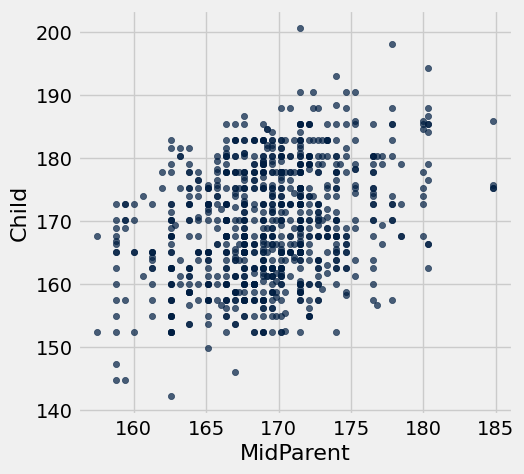

In [73]:
heights.scatter("MidParent")

--------------------------------------------------------------------

In [83]:
def predict_child(mph, calibrate=0.5*2.2):    
    close_points = heights.where("MidParent", are.between(mph-calibrate,mph+calibrate))
    return close_points.column('Child').mean() 

In [84]:
heights_with_predictions = heights.with_column(\
    'Prediction', heights.apply(predict_child, 'MidParent'))

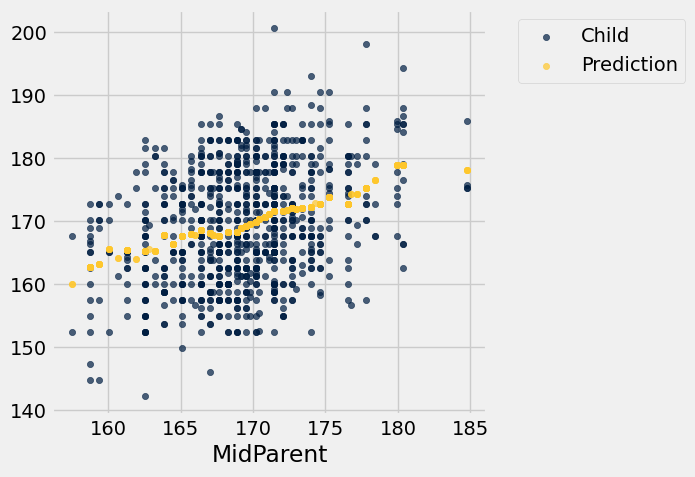

In [85]:
heights_with_predictions.scatter("MidParent")


In [86]:
#heights_with_predictions.plots("Prediction") 
#plt.plots("MidParent","Prediction")

# Correlación

In [87]:
hybrid = Table().read_table("hybrid.csv")

In [88]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


- **vehicle**: Modelo del coche  
- **year**: Año de fabricación  
- **msrp**: Precio minorista sugerido por el fabricante en dólares de 2013  
- **acceleration**: Tasa de aceleración en km por hora por segundo  
- **mpg**: Economía de combustible en millas por galón  
- **class**: La clase del modelo  


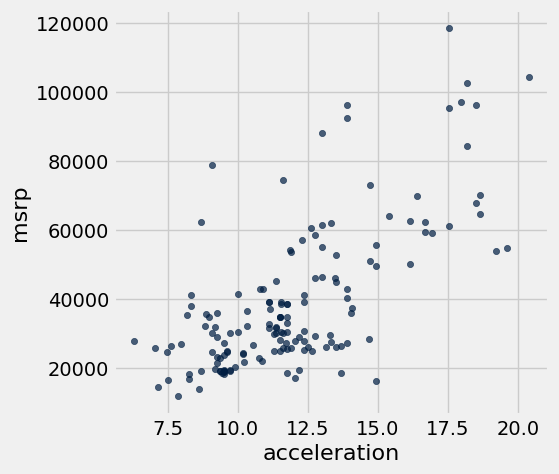

In [89]:
hybrid.scatter("acceleration", "msrp")

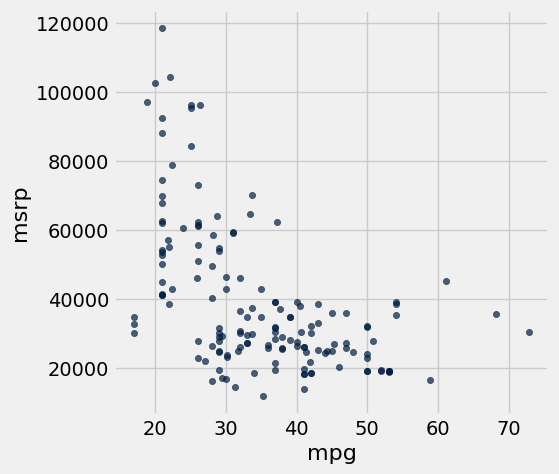

In [90]:
hybrid.scatter("mpg", "msrp")

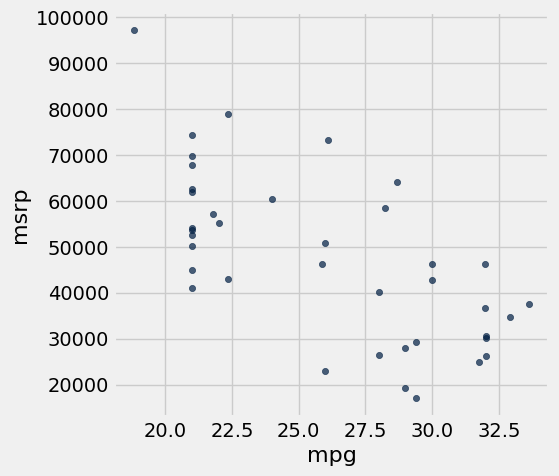

In [91]:
suv = hybrid.where("class", are.equal_to("SUV"))
suv.scatter("mpg", "msrp")

Convertimas los graficos a unidades estandar:

\begin{equation}
x_{norm} = \frac{x-\mu}{\sigma}
\end{equation}

In [92]:
def standard_units(any_number):
    return (any_number-np.mean(any_number))/np.std(any_number)
    

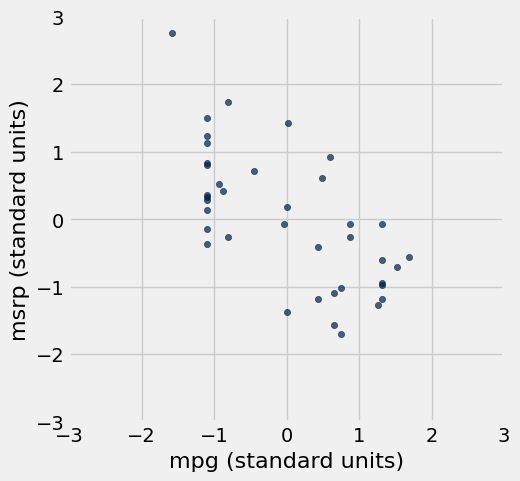

In [93]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

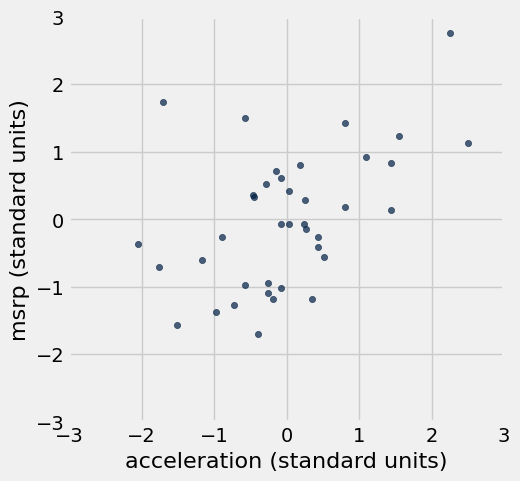

In [94]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

# Coeficiente de correlación

El coeficiente de correlación mide la fuerza de la relación lineal entre dos variables. Gráficamente, mide qué tan agrupado está el diagrama de dispersión alrededor de una línea recta.

- El coeficiente de correlación $r$ es un número entre $-1$ y $1$.  

- $r$ mide hasta qué punto el gráfico de dispersión se agrupa alrededor de una línea recta.  
- $r = 1$ si el diagrama de dispersión es una línea recta perfecta inclinada hacia arriba.  
- $r = -1$ si el diagrama de dispersión es una línea recta perfecta inclinada hacia abajo.  


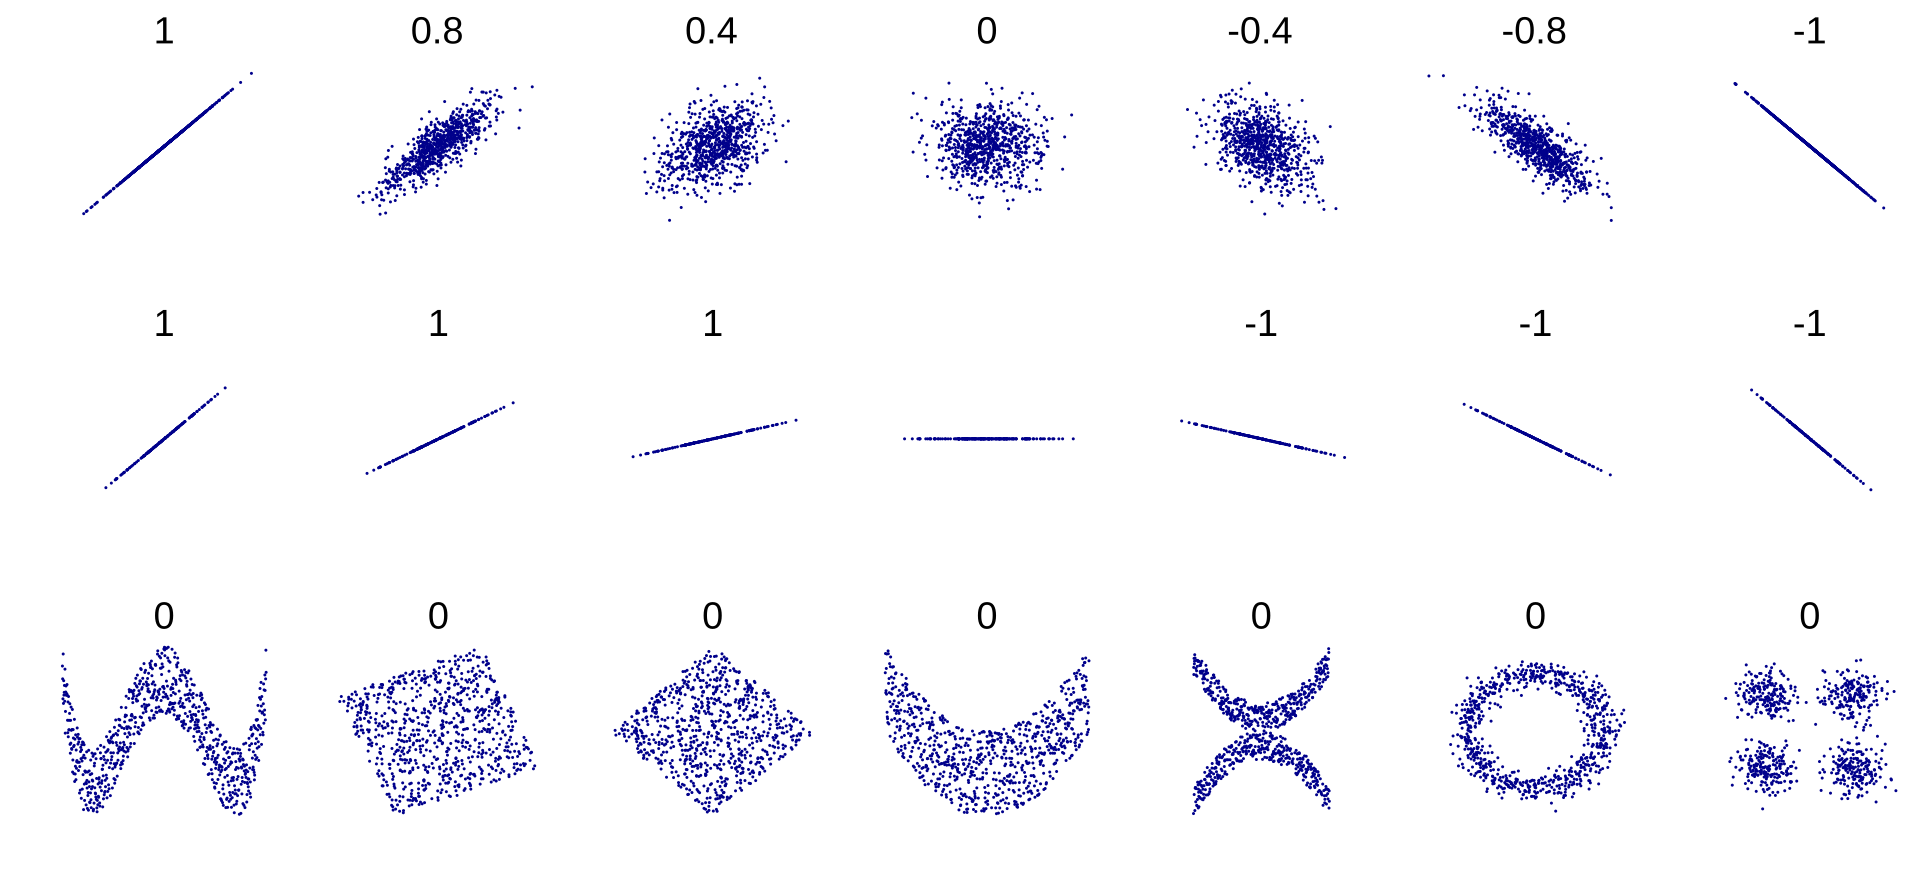

In [95]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


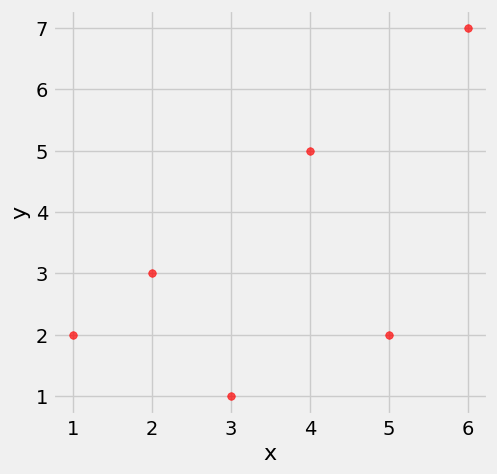

In [96]:
t.scatter(0, 1, s=30, color='red')



In [97]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


\begin{equation}
R = <x_{us} y_{us}>
\end{equation}

us standard units

In [99]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [100]:
r = np.mean(t_product.column(4))
r

0.61741639718977093

El coeficiente de correlación $r$ es un número puro. No tiene unidades, ya que $r$ se basa en unidades estándar.  

- $r$ no se verá afectado por el cambio de las unidades en cualquiera de los ejes.  
- $r$ no se verá afectado por el cambio de los ejes.  

Algebraicamente, esto se debe a que el producto de las unidades estándar no depende de qué variable se llama $x$ y cuál $y$.  

Geométricamente, conmutar los ejes refleja el gráfico de dispersión alrededor de la línea $y = x$, pero no cambia la cantidad de agrupación ni el signo de la asociación.  


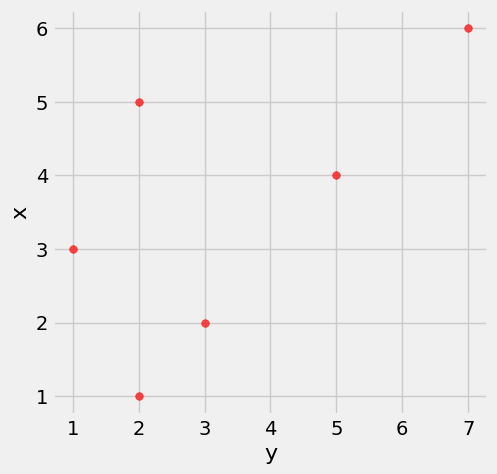

In [101]:
t.scatter('y', 'x', s=30, color='red')



# La función correlation



In [102]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [103]:
correlation(t, 'x', 'y')

0.61741639718977093

In [105]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [107]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

# La correlación no es causalidad

Consumo de chocolate y premios Nobel: Un estudio publicado en 2012 en la revista New England Journal of Medicine sugería una correlación entre el consumo de chocolate per cápita y el número de premios Nobel en un país

https://www.nejm.org/doi/abs/10.1056/NEJMon1211064?utm_source=chatgpt.com

https://www.nejm.org/doi/suppl/10.1056/NEJMon1211064/suppl_file/nejmon1211064_disclosures.pdf

https://inferentialthinking.com/_images/3e4a961cb64490b8e83af0ae3d95c97c395475b400e200557b71fbd3f8e915d3.png

# Correlación Medidas Asociación Lineal

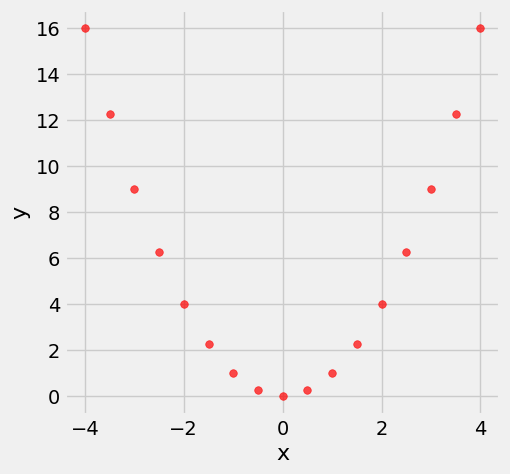

In [109]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [110]:
correlation(nonlinear, 'x', 'y')

0.0

# La correlación se ve afectada por los valores atípicos

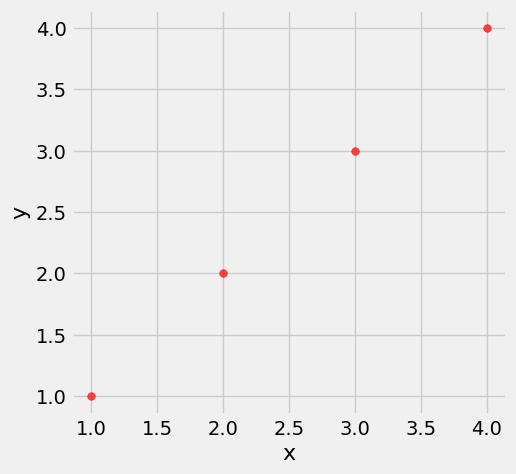

In [111]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

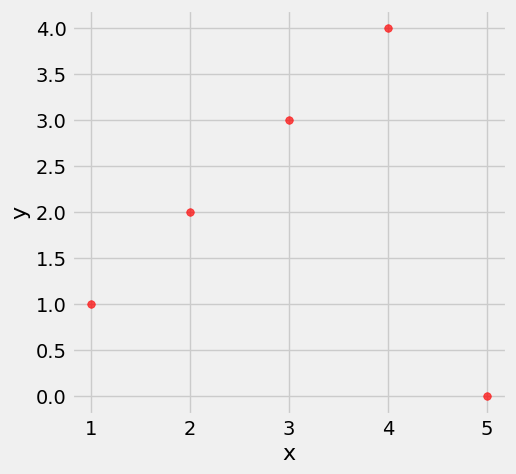

In [112]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [114]:
correlation(outlier, 'x', 'y')

0.0

# Las correlaciones ecológicas deben interpretarse con cuidado

Las correlaciones ecológicas son correlaciones calculadas a partir de datos agregados de grupos o poblaciones, en lugar de datos individuales. Estas correlaciones pueden llevar a conclusiones erróneas si se interpretan como relaciones que aplican a individuos, lo que se conoce como falacia ecológica.

**Diferencia entre correlación ecológica e individual**


**Correlación ecológica**: Usa datos agrupados (por país, ciudad, etc.).

**Correlación individual**: Usa datos a nivel de cada persona.

**Ejemplo:** Si se asume que una relación observada a nivel de grupos se aplica automáticamente a los individuos dentro de esos grupos, se puede cometer un error. Por ejemplo, si en un país con alto ingreso promedio hay alta alfabetización, no significa que todas las personas ricas sean alfabetizadas ni que todas las personas pobres sean analfabetas.

In [115]:
sat2014 = Table.read_table("sat2014.csv")

In [116]:
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
North Dakota,2.3,612,620,584,1816
Illinois,4.6,599,616,587,1802
Iowa,3.1,605,611,578,1794
South Dakota,2.9,604,609,579,1792
Minnesota,5.9,598,610,578,1786
Michigan,3.8,593,610,581,1784
Wisconsin,3.9,596,608,578,1782
Missouri,4.2,595,597,579,1771
Wyoming,3.3,590,599,573,1762
Kansas,5.3,591,596,566,1753


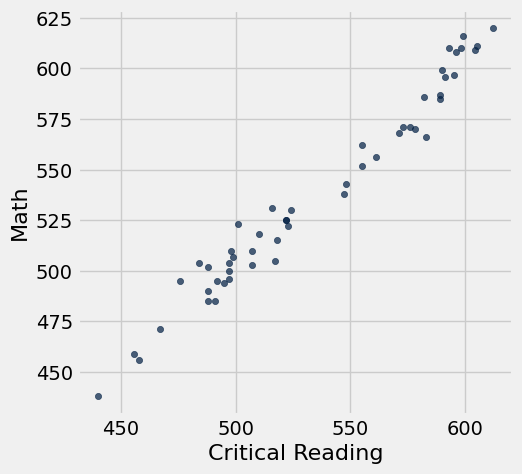

In [117]:
sat2014.scatter('Critical Reading', 'Math')

In [118]:
correlation(sat2014,'Critical Reading', 'Math')

0.9847558411067433

# Regresión lineal

In [119]:
data = Table.read_table("family_heights.csv")
pul_to_cm=2.54 
altura_media_cm = (data.column("father") + data.column("mother"))*pul_to_cm/2
heights = Table().with_columns("MidParent", altura_media_cm, "Child", pul_to_cm*data.column("child"))

In [120]:
heights

MidParent,Child
184.785,185.928
184.785,175.768
184.785,175.26
184.785,175.26
180.34,186.69
180.34,184.15
180.34,166.37
180.34,166.37
176.53,180.34
176.53,172.72


In [121]:
def predict_child(mpht,pul_to_cm=2.54):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5*pul_to_cm, mpht + 0.5*pul_to_cm))
    return close_points.column('Child').mean()   

In [122]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

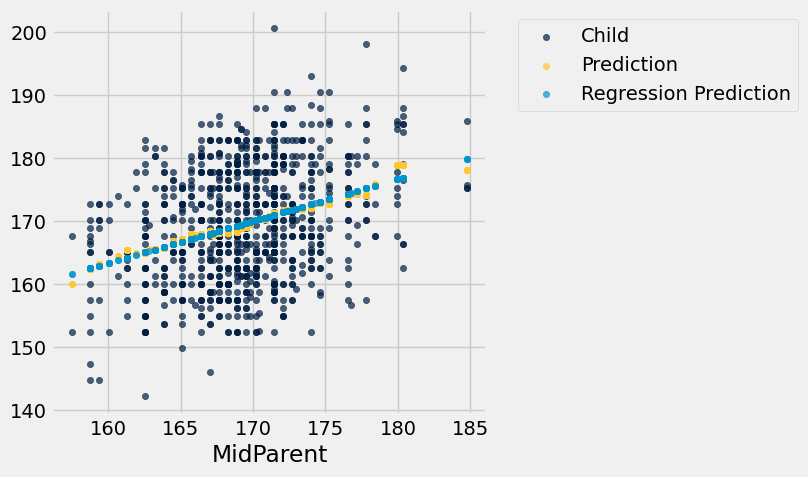

In [163]:
heights_with_predictions.scatter('MidParent')

# Medición en unidades estándar

In [124]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

In [125]:
heights_SU = Table().with_columns(
    'MidParent SU', standard_units(heights.column('MidParent')),
    'Child SU', standard_units(heights.column('Child'))
)
heights_SU

MidParent SU,Child SU
3.51798,1.80416
3.51798,0.686005
3.51798,0.630097
3.51798,0.630097
2.50985,1.88802
2.50985,1.60848
2.50985,-0.348285
2.50985,-0.348285
1.64573,1.18917
1.64573,0.350559


In [126]:
sd_midparent = np.std(heights.column(0))
mean_midparent = np.mean(heights.column(0))
print("Standard desviation ",sd_midparent)
print("Standard units", mean_midparent)


mean_midparent_SU = np.mean(heights_SU.column(0))
sd_midparent_SU = np.std(heights_SU.column(0))
print("Standard desviation in standard units",sd_midparent_SU)
print("Standard units in standard units", mean_midparent_SU)

Standard desviation  4.40914020732
Standard units 169.273731263
Standard desviation in standard units 1.0
Standard units in standard units 6.93806183098e-15


In [127]:
0.5*pul_to_cm/sd_midparent

0.28803801654821209

# Construyamos una funcion que nos permita definir que tan cerca debemos estar

In [129]:
def predict_child_su(mpht_su,pul_to_cm=2.54):
    """Return a prediction of the height (in standard units) of a child 
    whose parents have a midparent height of mpht_su in standard units.
    """
    close = 0.5*pul_to_cm/sd_midparent
    close_points = heights_SU.where('MidParent SU', are.between(mpht_su-close, mpht_su + close))
    return close_points.column('Child SU').mean()   

In [130]:
heights_with_su_predictions = heights_SU.with_column(
    'Prediction SU', heights_SU.apply(predict_child_su, 'MidParent SU')
    )

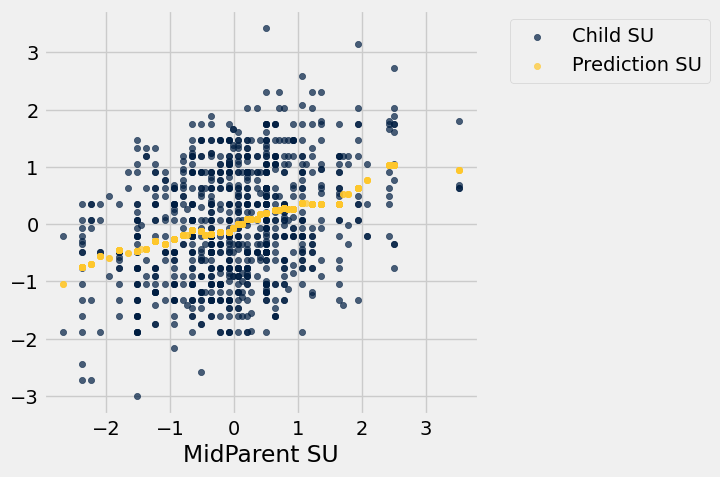

In [131]:
heights_with_su_predictions.scatter('MidParent SU')

# Relación entre $ r^2 $ y la pendiente en unidades estándar

En un gráfico donde **x** e **y** están en unidades estándar, la relación entre $ r^2 $ y la pendiente de la recta de regresión es la siguiente:  

## 1. Relación entre $r^2$ y la pendiente  
- La **pendiente de la recta de regresión de $ y $ sobre $ x $** en unidades estándar es **igual al coeficiente de correlación** $r $.  
- El **coeficiente de determinación** $ r^2 $ representa la proporción de la varianza de $ y $ explicada por $ x $.  

Por lo tanto, si la pendiente de la recta de regresión es **$ r $**, entonces:  
\begin{equation}
r^2 = (\text{pendiente})^2
\end{equation}

Es decir, **$ r^2 $ es simplemente el cuadrado de la pendiente**.  

## 2. Interpretación  
- Si la correlación $ r $ es fuerte $ r \approx 1$ o $ r \approx -1 $, la pendiente estará cerca de $ 1 $ o $ -1 $, y $ r^2 $ será alto, lo que indica que la regresión explica casi toda la variabilidad de $y$.  
- Si $r$ es cercano a **0**, la pendiente será pequeña y $ r^2 $ será bajo, indicando que $ x $ explica muy poco la variabilidad de $y$.  

## 3. Ejemplo numérico  
Si $ r = 0.8 $, la pendiente de la recta de regresión es **0.8** y:  
\begin{equation}
r^2 = 0.8^2 = 0.64
\end{equation}
Esto significa que el **64% de la variabilidad de $ y $ es explicada por $ x $**.  


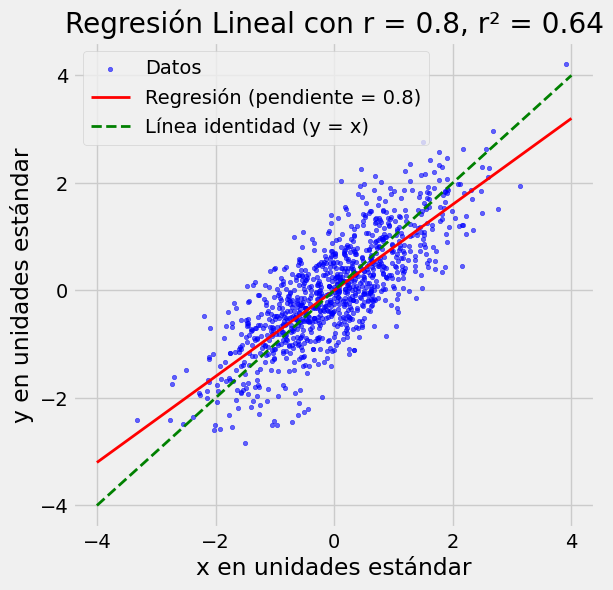

In [148]:
regresion_lineal(0.80)  # Puedes cambiar 0.5 por otro valor como 1.0 o -0.8

# Para el ejemplo de los padres

In [149]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))



In [150]:
family_r = correlation(heights, 'MidParent', 'Child')
family_r

0.32244267720033087

In [151]:
family_slope = slope(heights, 'MidParent', 'Child')
family_intercept = intercept(heights, 'MidParent', 'Child')
family_slope, family_intercept

(0.66449526235258871, 57.053073487627373)

In [152]:
family_slope * 170.0 + family_intercept



170.01726808756746

In [155]:
heights_with_predictions

MidParent,Child,Prediction,Regression Prediction
184.785,185.928,178.054,179.842
184.785,175.768,178.054,179.842
184.785,175.26,178.054,179.842
184.785,175.26,178.054,179.842
180.34,186.69,178.856,176.888
180.34,184.15,178.856,176.888
180.34,166.37,178.856,176.888
180.34,166.37,178.856,176.888
176.53,180.34,173.996,174.356
176.53,172.72,173.996,174.356


In [157]:
heights_with_predictions.where('MidParent', are.equal_to(176.53)).show(3)

MidParent,Child,Prediction,Regression Prediction
176.53,180.34,173.996,174.356
176.53,172.72,173.996,174.356
176.53,179.07,173.996,174.356


In [158]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', family_slope * heights.column('MidParent') + family_intercept
)
heights_with_predictions

MidParent,Child,Prediction,Regression Prediction
184.785,185.928,178.054,179.842
184.785,175.768,178.054,179.842
184.785,175.26,178.054,179.842
184.785,175.26,178.054,179.842
180.34,186.69,178.856,176.888
180.34,184.15,178.856,176.888
180.34,166.37,178.856,176.888
180.34,166.37,178.856,176.888
176.53,180.34,173.996,174.356
176.53,172.72,173.996,174.356


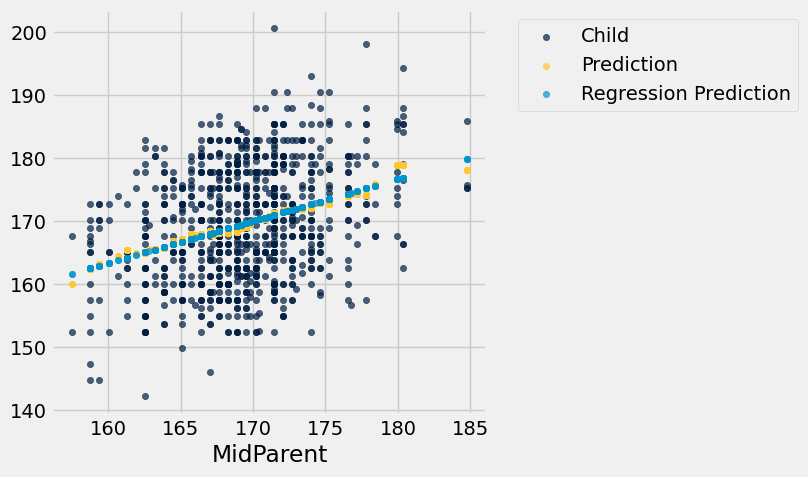

In [159]:
heights_with_predictions.scatter('MidParent')

# Valores ajustados

In [160]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

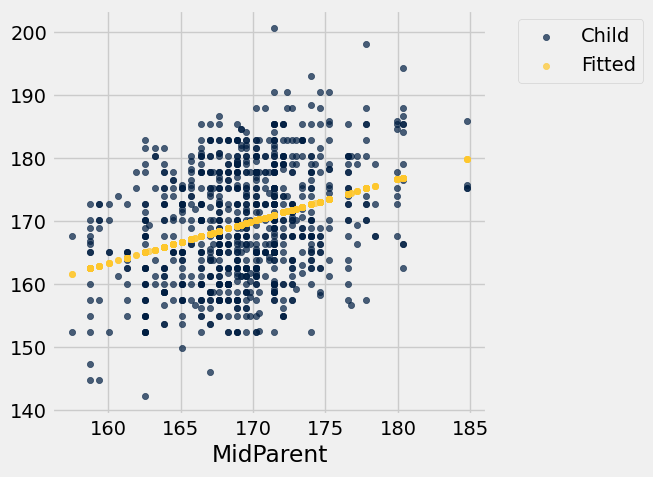

In [161]:
heights.with_column('Fitted', fit(heights, 'MidParent', 'Child')).scatter('MidParent')

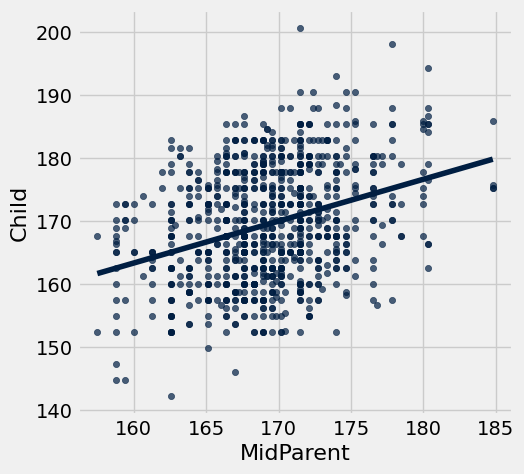

In [162]:
heights.scatter('MidParent', fit_line=True)